Experiment 2: Nonlinear Systems: Logistic Map and Chaos

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The logistic map is a mathematical model that illustrates how simple nonlinear systems can lead to complex, often chaotic behavior.

### Overview of the Logistic Map
The logistic map equation is:
$$ x_{n+1} = r \cdot x_n \cdot (1 - x_n) $$

Where:
- $x_n$ represents the state of the system at the \( n \)-th iteration (for example, a population’s proportion relative to its maximum capacity).
- $r$ is a parameter known as the **growth rate** or **control parameter**.
- $x_n+1$ is the state of the system at the next iteration.

### The Impact of Varying \( r \)
The control parameter \( r \) has a profound impact on the behavior of the logistic map:

1. **Low Values of \( r \): Stability and Extinction (0 < r < 1)**:
   - When \( r \) is between 0 and 1, the values of \( x \) converge to zero over time, simulating population extinction. Here, the growth rate is too low for the population to sustain itself.

2. **Moderate Values of \( r \): Stable Equilibrium (1 < r < 3)**:
   - For \( r \) between 1 and 3, the system eventually stabilizes at a single value. This means that after initial fluctuations, the population reaches a steady state.
   - **Physics Insight**: This behavior resembles systems in equilibrium, where forces balance out, and the system reaches a stable configuration.

3. **Higher Values of \( r \): Periodic Oscillations (3 < r < 3.57)**:
   - When \( r \) exceeds 3, the logistic map starts exhibiting **periodic oscillations**. For instance:
     - Around \( r = 3.1 \), the population oscillates between two values—a phenomenon called a **period-2 cycle**.
     - As \( r \) increases, these cycles double (period-4, period-8, etc.), a process known as **period-doubling bifurcation**.
   - **Physics Insight**: Period-doubling is a common pathway to chaos and is observed in various physical systems, such as electrical circuits and fluid flow, where stable oscillations become chaotic with changing conditions.

4. **Chaos (3.57 < r < 4)**:
   - Beyond \( r = 3.57 \), the system becomes chaotic, meaning that \( x \) fluctuates unpredictably and never settles into a repeating pattern.
   - **Sensitive Dependence on Initial Conditions**: Small changes in \( x_0 \) (the starting value) lead to drastically different outcomes, a hallmark of chaotic systems.
   - **Physics Insight**: Chaotic systems like this exhibit deterministic unpredictability—while the system follows a rule (the logistic map equation), predicting future states is practically impossible due to sensitivity to initial conditions.

5. **Values Close to \( r = 4 \)**:
   - At \( r = 4 \), the system is maximally chaotic and can behave like a pseudo-random number generator. 
   - **Physics Insight**: The system’s outcome looks random but follows a deterministic rule, making it useful for applications that need randomness in a controlled way.

In [40]:
# Function to calculate logistic map values
def logistic_map(r, x0, n=100):
    x = np.zeros(n)
    x[0] = x0 # set the initial condition
    for i in range(1, n):
        x[i] = r * x[i - 1] * (1 - x[i - 1])  # logistic map equation
        # (1-x[i-1]) is the limiting factor
    return x

In [41]:
r_values = [0.5, 0.7, 1, 1.5, 2.5, 3.0, 3.5, 3.57, 3.7, 3.9, 4, 4.02]
n_iterations = 100
x0_base = 0.5  # base initial condition

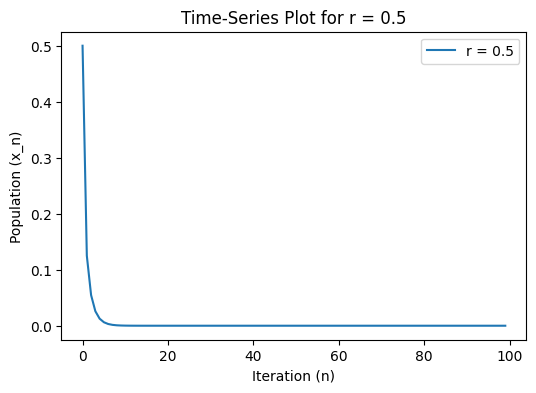

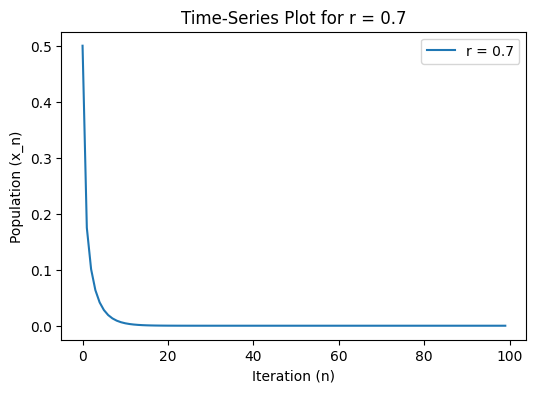

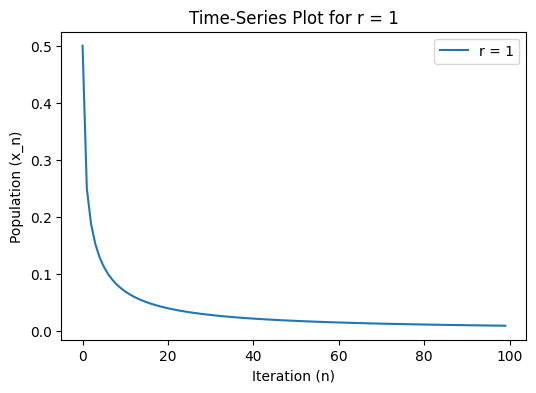

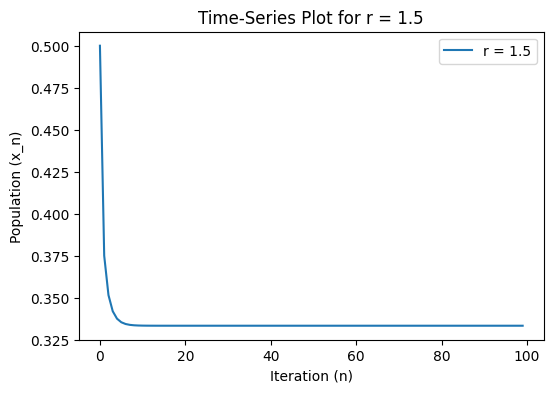

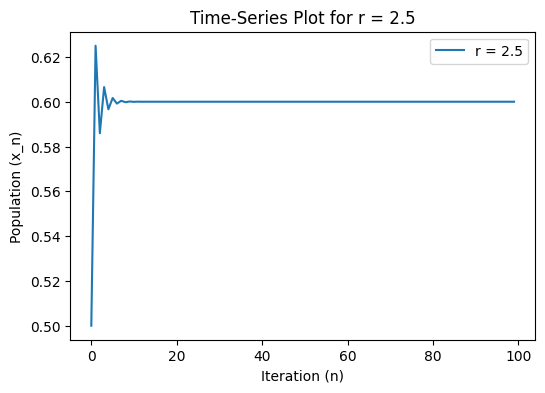

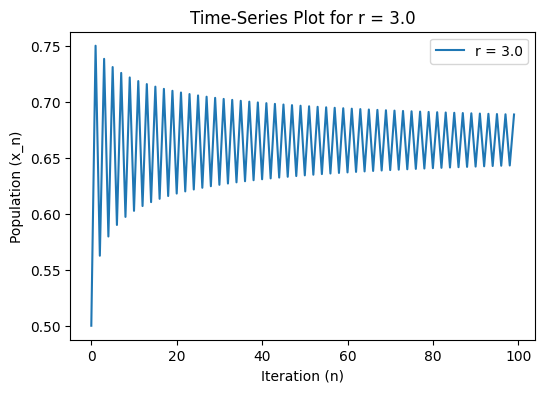

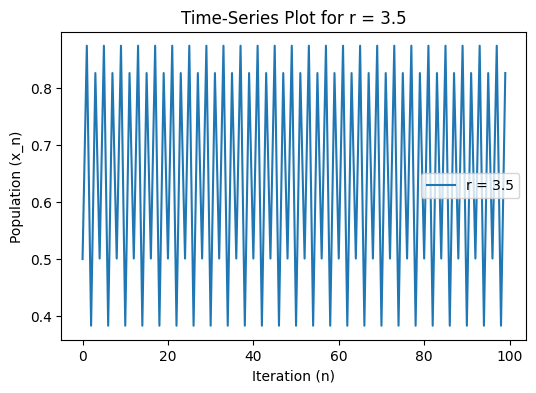

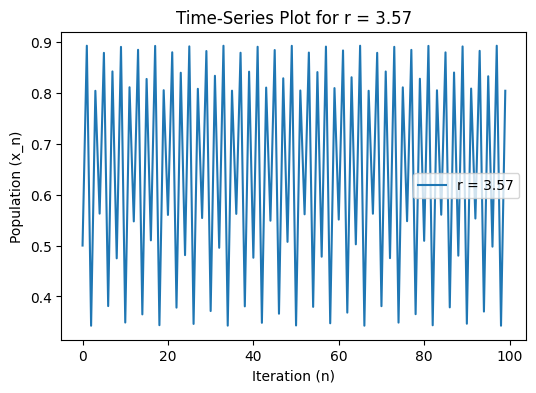

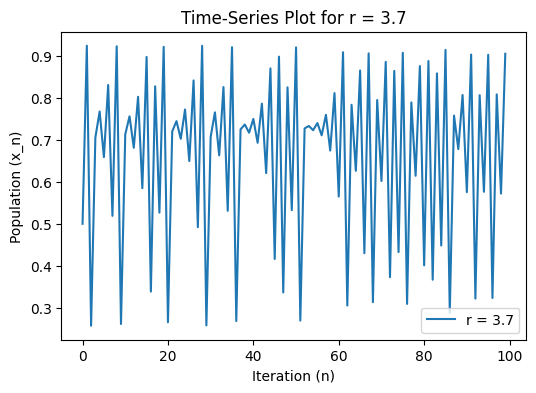

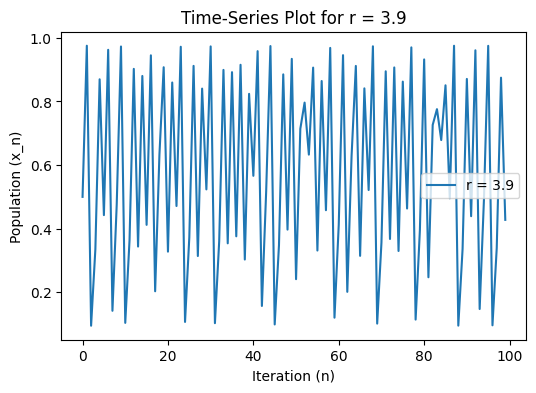

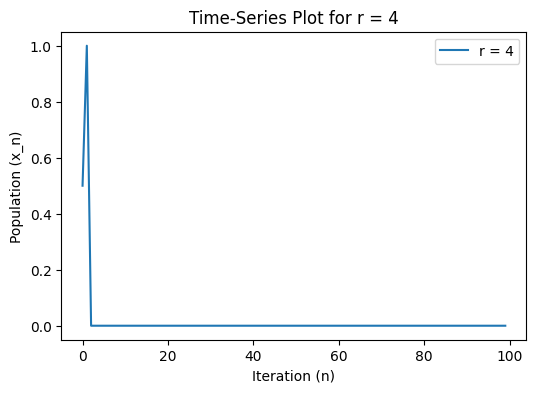

/var/folders/c3/299z_6451mlglnxycxmfkc1c0000gn/T/ipykernel_57389/3116542074.py:6: RuntimeWarning: overflow encountered in scalar multiply
  x[i] = r * x[i - 1] * (1 - x[i - 1])  # logistic map equation


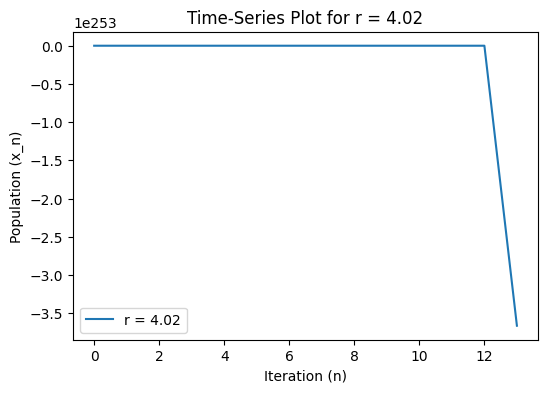

In [42]:
# Task 1: Time-series plots for different r values
# Plot individual graphs for each r
for r in r_values:
    x_values = logistic_map(r, x0_base, n_iterations)
    plt.figure(figsize=(6, 4))
    plt.plot(range(n_iterations), x_values, label=f'r = {r}')
    plt.xlabel("Iteration (n)")
    plt.ylabel("Population (x_n)")
    plt.title(f"Time-Series Plot for r = {r}")
    plt.legend()
    plt.show()

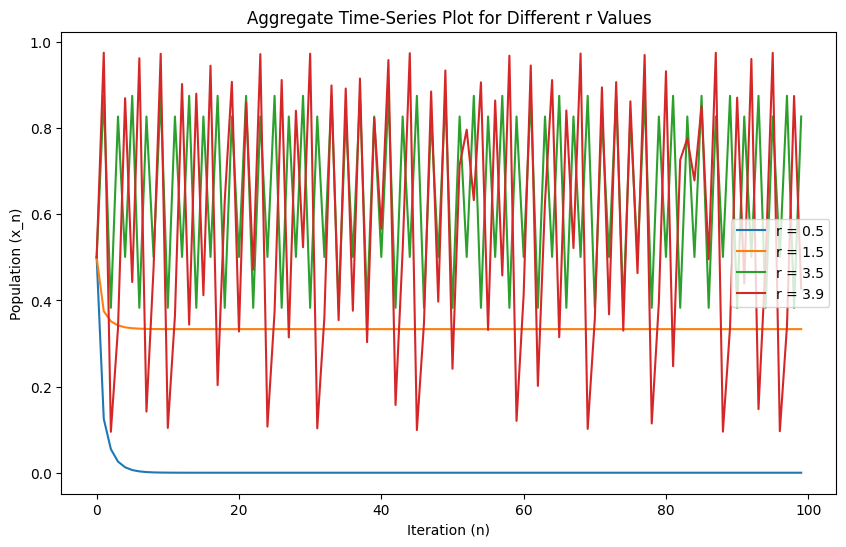

In [43]:
# Aggregate plot with all r values
plt.figure(figsize=(10, 6))
# skipping over some r values as there are many
for r in r_values[::3]:
    x_values = logistic_map(r, x0_base, n_iterations)
    plt.plot(range(n_iterations), x_values, label=f'r = {r}')
plt.xlabel("Iteration (n)")
plt.ylabel("Population (x_n)")
plt.title("Aggregate Time-Series Plot for Different r Values")
plt.legend()
plt.show()

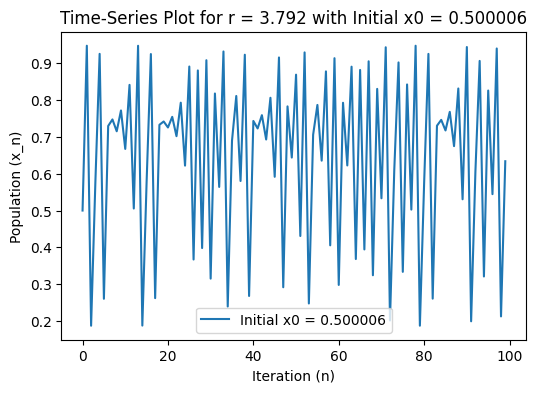

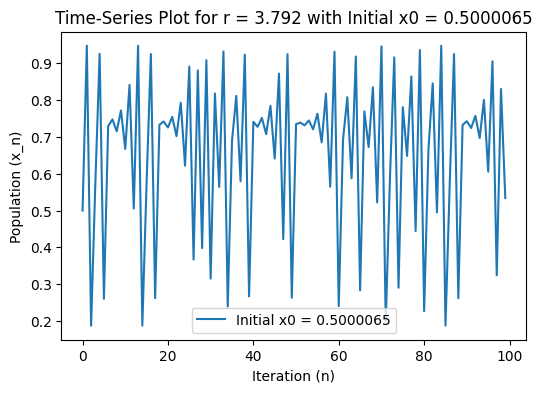

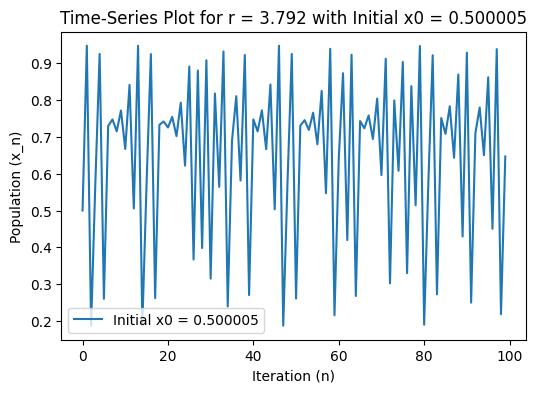

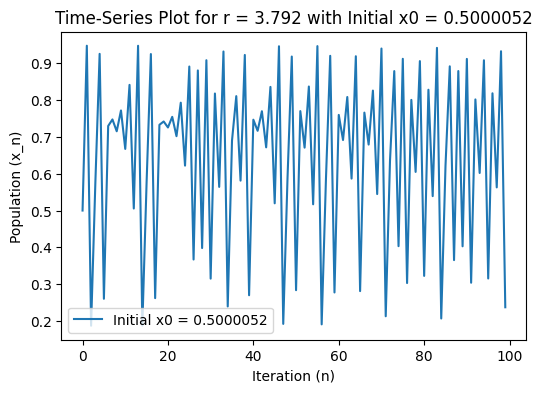

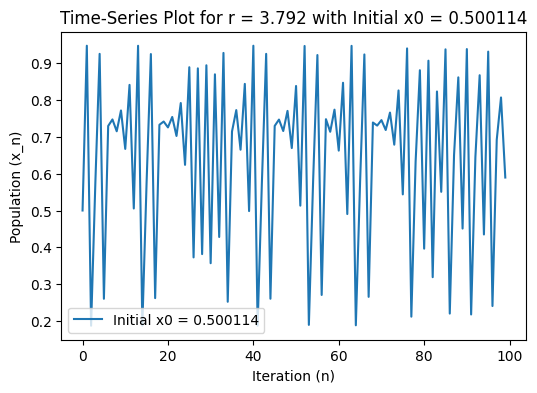

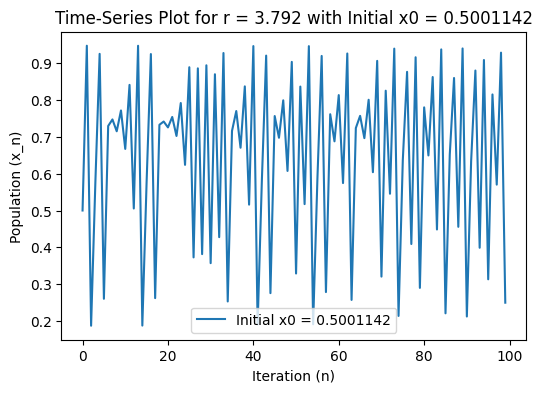

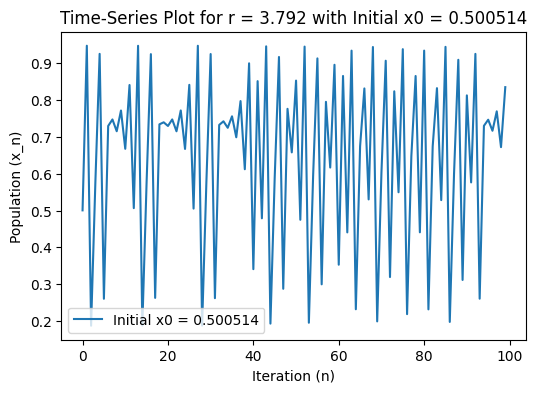

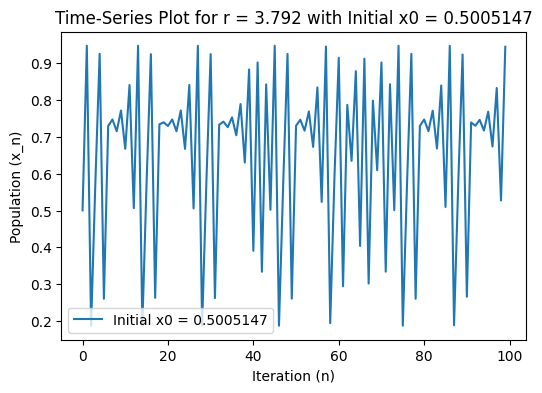

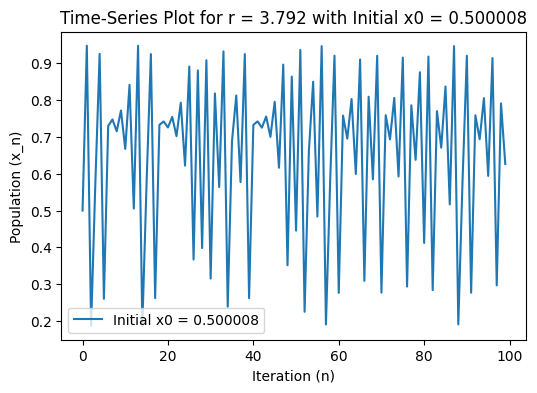

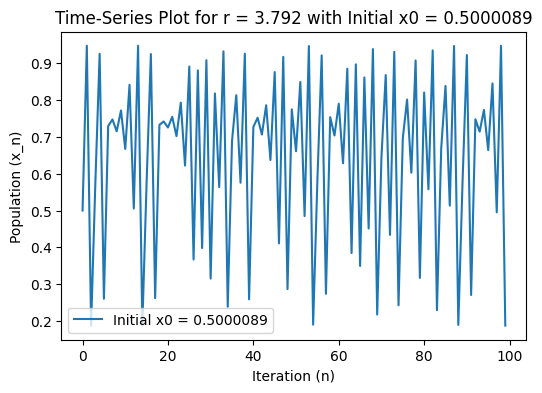

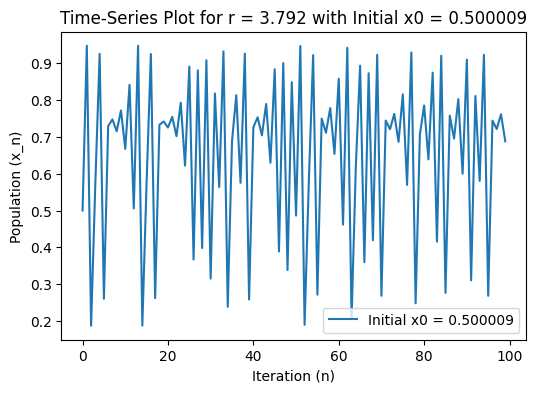

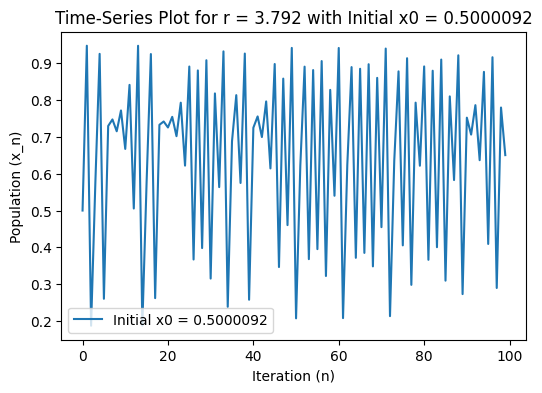

In [44]:
# Task 2: Sensitivity to initial conditions
r = 3.792
x0 = 0.500006  # based on roll number 006
x0_variation = 0.500007  # a small change in initial condition

# initial_conditions = [0.500006, 0.5000065]  # Slightly different initial conditions
# dedeepya, gourav, aditya, parv, mathew
initial_conditions_arr = [[0.500006, 0.5000065], [0.500005, 0.5000052], [0.500114, 0.5001142], [0.500514, 0.5005147], [0.500008, 0.5000089], [0.500009, 0.5000092]]
# Separate plots for each initial condition
for initial_conditions in initial_conditions_arr:
    for x0 in initial_conditions:
        x_values = logistic_map(r, x0, n_iterations)
        plt.figure(figsize=(6, 4))
        plt.plot(range(n_iterations), x_values, label=f'Initial x0 = {x0}')
        plt.xlabel("Iteration (n)")
        plt.ylabel("Population (x_n)")
        plt.title(f"Time-Series Plot for r = {r} with Initial x0 = {x0}")
        plt.legend()
        plt.show()

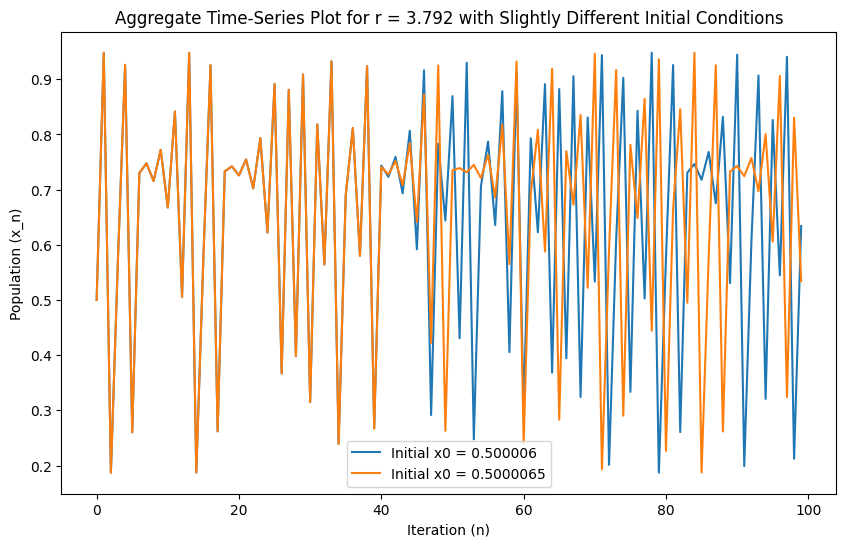

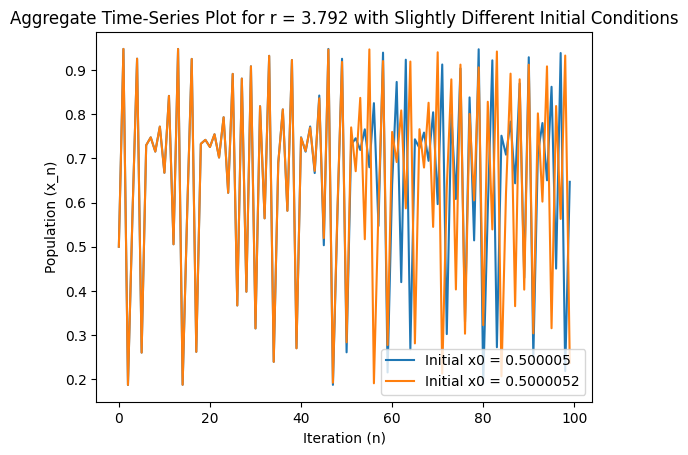

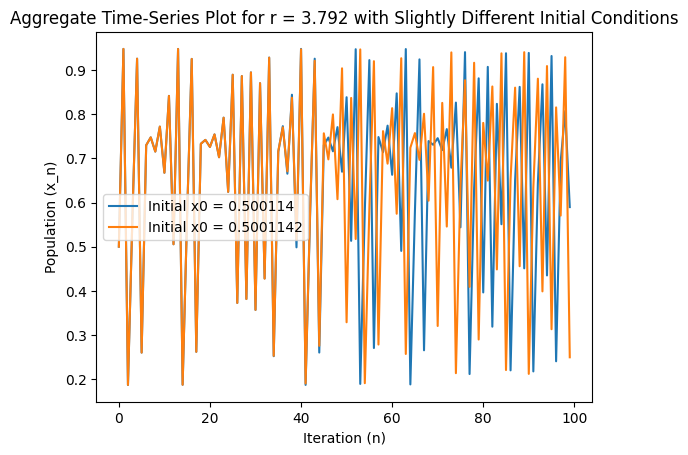

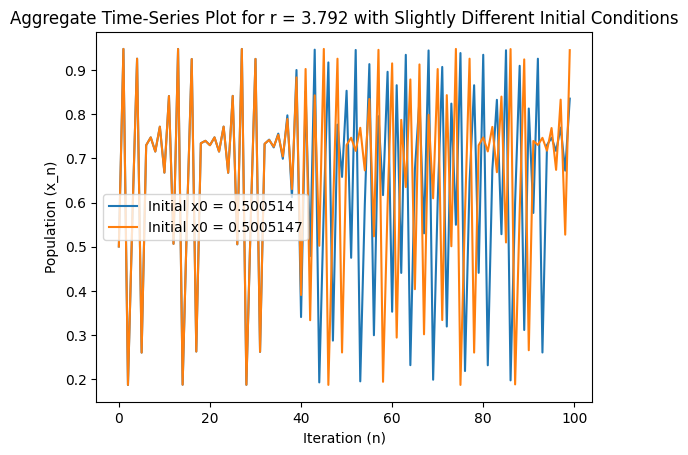

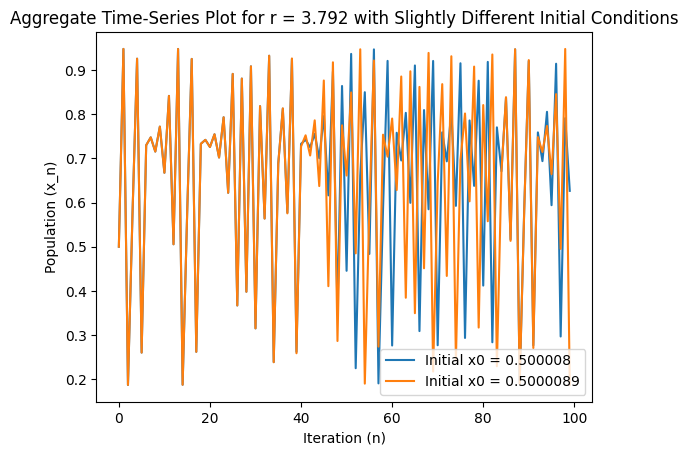

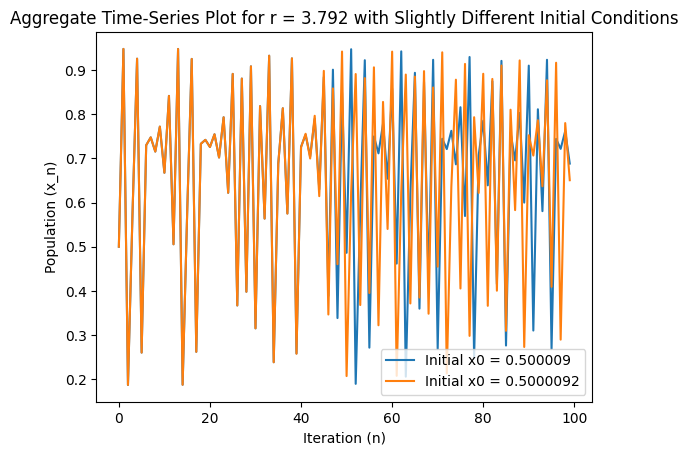

In [45]:
plt.figure(figsize=(10, 6))
for initial_conditions in initial_conditions_arr:
    for x0 in initial_conditions:
        x_values = logistic_map(r, x0, n_iterations)
        plt.plot(range(n_iterations), x_values, label=f'Initial x0 = {x0}')
    plt.xlabel("Iteration (n)")
    plt.ylabel("Population (x_n)")
    plt.title(f"Aggregate Time-Series Plot for r = {r} with Slightly Different Initial Conditions")
    plt.legend()
    plt.show()

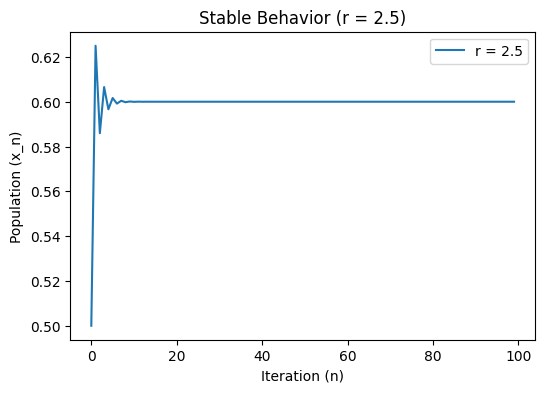

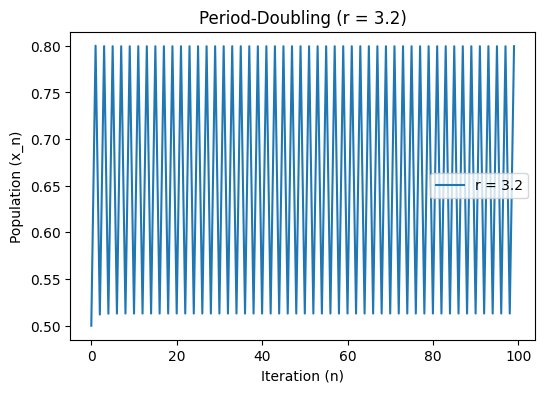

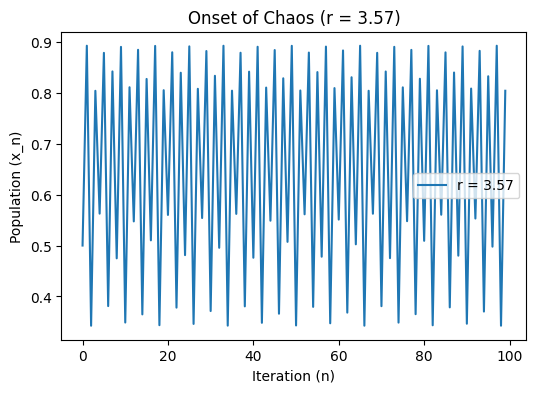

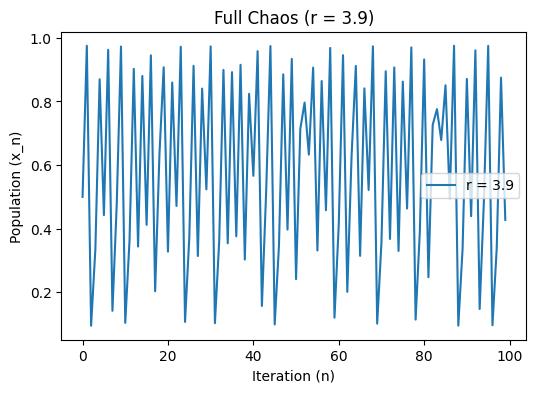

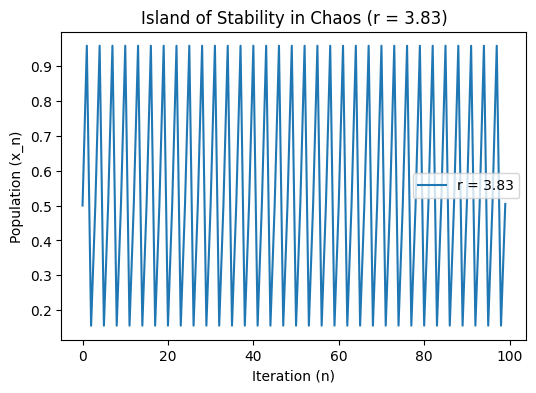

In [46]:
# Parameters
n_iterations = 100  # Number of iterations
x0 = 0.5  # Initial condition

# Case 1: Stability (r = 2.5)
r_stable = 2.5
x_stable = logistic_map(r_stable, x0, n_iterations)
plt.figure(figsize=(6, 4))
plt.plot(range(n_iterations), x_stable, label=f'r = {r_stable}')
plt.xlabel("Iteration (n)")
plt.ylabel("Population (x_n)")
plt.title("Stable Behavior (r = 2.5)")
plt.legend()
plt.show()

# Case 2: Period-Doubling (r = 3.2)
r_period_2 = 3.2
x_period_2 = logistic_map(r_period_2, x0, n_iterations)
plt.figure(figsize=(6, 4))
plt.plot(range(n_iterations), x_period_2, label=f'r = {r_period_2}')
plt.xlabel("Iteration (n)")
plt.ylabel("Population (x_n)")
plt.title("Period-Doubling (r = 3.2)")
plt.legend()
plt.show()

# Case 3: Onset of Chaos (r = 3.57)
r_chaos_start = 3.57
x_chaos_start = logistic_map(r_chaos_start, x0, n_iterations)
plt.figure(figsize=(6, 4))
plt.plot(range(n_iterations), x_chaos_start, label=f'r = {r_chaos_start}')
plt.xlabel("Iteration (n)")
plt.ylabel("Population (x_n)")
plt.title("Onset of Chaos (r = 3.57)")
plt.legend()
plt.show()

# Case 4: Full Chaos (r = 3.9)
r_full_chaos = 3.9
x_full_chaos = logistic_map(r_full_chaos, x0, n_iterations)
plt.figure(figsize=(6, 4))
plt.plot(range(n_iterations), x_full_chaos, label=f'r = {r_full_chaos}')
plt.xlabel("Iteration (n)")
plt.ylabel("Population (x_n)")
plt.title("Full Chaos (r = 3.9)")
plt.legend()
plt.show()

# Case 5: Island of Stability within Chaos (r = 3.83)
r_stable_in_chaos = 3.83
x_stable_in_chaos = logistic_map(r_stable_in_chaos, x0, n_iterations)
plt.figure(figsize=(6, 4))
plt.plot(range(n_iterations), x_stable_in_chaos, label=f'r = {r_stable_in_chaos}')
plt.xlabel("Iteration (n)")
plt.ylabel("Population (x_n)")
plt.title("Island of Stability in Chaos (r = 3.83)")
plt.legend()
plt.show()

Here’s a detailed Markdown explanation for **Task 3a** and **Task 3b**:

---

### Task 3a: Bifurcation Diagram of the Logistic Map

The **bifurcation diagram** is a powerful tool to visualize how varying the control parameter \( r \) affects the long-term behavior of the logistic map. By plotting this diagram, we can observe the different regimes of behavior as \( r \) increases from 1 to 4. Here’s what we learn from this visualization:

1. **Stable Regions (1 < \( r \) < 3)**:
   - For low values of \( r \), the population settles at a single, stable value, indicating a steady equilibrium.
   - As \( r \) approaches 3, the system begins to oscillate between two values, marking the first **bifurcation** or **period-2 cycle**.

2. **Period-Doubling and Path to Chaos (3 < \( r \) < 3.57)**:
   - As \( r \) increases, the number of oscillation points doubles (period-4, period-8, etc.), leading to what’s known as the **period-doubling route to chaos**.
   - Each time the system bifurcates, the period of oscillation doubles, showing that the system becomes more complex with each step.

3. **Chaotic Region (3.57 < \( r \) < 4)**:
   - At around \( r = 3.57 \), the bifurcations accumulate and the system enters a chaotic regime. Here, the population values become highly sensitive to initial conditions, exhibiting unpredictable and non-repeating patterns.
   - This chaotic behavior is a hallmark of sensitive dependence on initial conditions, which means that even a tiny change in the starting point can lead to significantly different outcomes over time.

4. **Islands of Stability**:
   - Within the chaotic region, there are specific ranges of \( r \) (e.g., around \( r = 3.83 \)) where the system temporarily regains periodic behavior. These are called **islands of stability**, and they appear as distinct bands in the chaotic region of the bifurcation diagram.
   - These islands reveal that chaotic systems are not uniformly unpredictable; they can occasionally return to stable cycles even within an overall chaotic regime.

### Task 3b: Zoomed-In View of the Period-3 Window

The period-3 window, found around \( r \approx 3.83 \), is a unique feature within the chaotic region. In **Task 3b**, we focus on this window to observe **self-similarity**, a fundamental characteristic of chaotic systems and fractals.

1. **Period-3 Behavior**:
   - Within this range, the logistic map demonstrates a **period-3 cycle** where the population oscillates among three stable values.
   - This behavior is an example of an island of stability in chaos, showing that even in a chaotic regime, specific parameter values can lead to regular, periodic oscillations.

2. **Self-Similarity**:
   - The zoomed-in view of the period-3 window reveals that this section resembles the structure of the larger bifurcation diagram. This **self-similar** pattern is characteristic of chaotic systems, where zooming in on certain regions reveals repetitive structures.
   - Self-similarity is an essential property in fractal geometry, and its presence in the logistic map indicates the deep, complex behavior within chaotic systems.

3. **Significance of the Period-3 Window**:
   - The period-3 window demonstrates that chaos in the logistic map is not uniform; it includes regions where the system can revert to a stable, repeating cycle. This structure makes chaotic behavior in systems like the logistic map more nuanced and complex.
   - Observing self-similarity in chaotic systems has applications in various fields, including physics, biology, and finance, where understanding patterns in chaotic data can be crucial.

---

In summary, **Task 3a** introduces us to the full bifurcation diagram, showcasing the path from stability to chaos, while **Task 3b** zooms in on the period-3 window within chaos to reveal self-similar structures. Both tasks illustrate the unpredictable yet structured nature of chaotic systems, providing insights into the behavior of nonlinear dynamical systems.

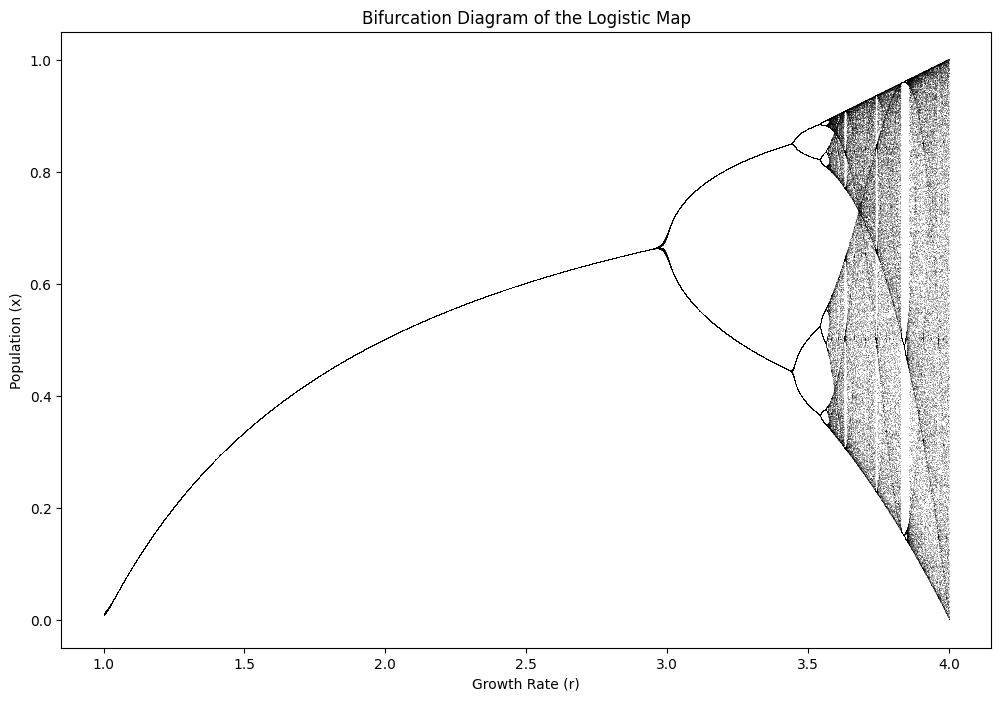

In [47]:
# Bifurcation Diagram for a Comprehensive View
r_values = np.linspace(1, 4, 10000)  # Range of r values for bifurcation diagram
n_skip = 100  # Skip initial transients
n_collect = 50  # Collect stable values after transients

x_vals = []
r_vals = []

# Generate bifurcation data
for r in r_values:
    x = logistic_map(r, x0, n_skip + n_collect)
    x_vals.extend(x[-n_collect:])  # Collect stable values only
    r_vals.extend([r] * n_collect)

# Plotting the bifurcation diagram
plt.figure(figsize=(12, 8))
plt.plot(r_vals, x_vals, ',k', alpha=0.25)  # Pixel marker for density
plt.xlabel("Growth Rate (r)")
plt.ylabel("Population (x)")
plt.title("Bifurcation Diagram of the Logistic Map")
plt.show()

In [52]:
r1 = 2.9520
r2 = 3.4336
r3 = 3.5386
r4 = 3.5623



d1 = r2 - r1
d2 = r3 - r2
d3 = r4 - r3


ratio1 = d1/d2
ratio2 = d2/d3

In [53]:
print(f"Ratio 1: {ratio1}")
print(f"Ratio 2: {ratio2}")

Ratio 1: 4.58666666666667
Ratio 2: 4.430379746835474
Ratio 3: 39.50000000000407
Ratio 4: 3.0


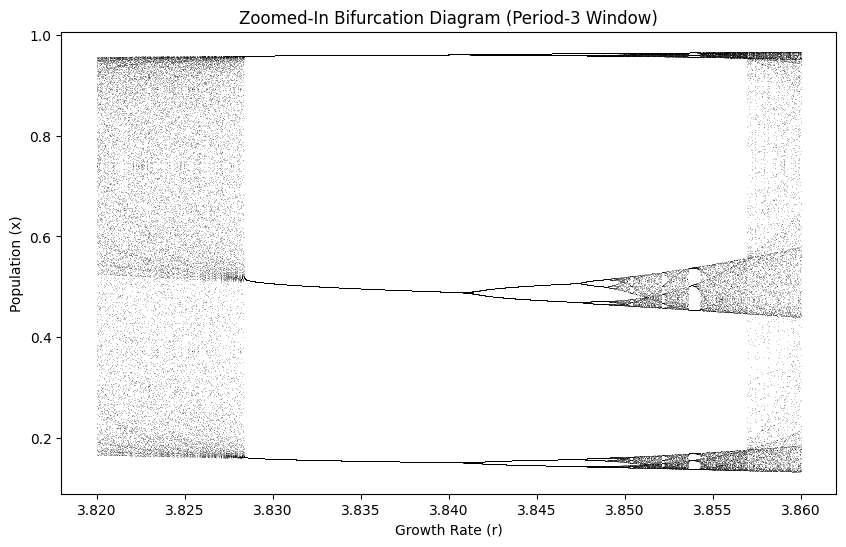

In [50]:
# Parameters for the zoomed-in bifurcation diagram
# 3.82 to 3.86
r_zoom = np.linspace(3.82, 3.86, 2000)  # Focusing on the period-3 window
n_skip = 100  # Skip initial transient values
n_collect = 50  # Number of values to collect for each r after transients

x0 = 0.5  # Initial condition
x_vals_zoom = []
r_vals_zoom = []

# Generate data for the zoomed-in bifurcation diagram
for r in r_zoom:
    x = logistic_map(r, x0, n_skip + n_collect)
    x_vals_zoom.extend(x[-n_collect:])  # Collect the stable points
    r_vals_zoom.extend([r] * n_collect)

# Plotting the zoomed-in bifurcation diagram for the period-3 window
plt.figure(figsize=(10, 6))
plt.plot(r_vals_zoom, x_vals_zoom, ',k', alpha=0.25)  # Use pixel markers for high density
plt.xlabel("Growth Rate (r)")
plt.ylabel("Population (x)")
plt.title("Zoomed-In Bifurcation Diagram (Period-3 Window)")
plt.show()

In [51]:

# Feigenbaum constant calculation
feigenbaum_constant = (r4 - r2) / (r8 - r4)

